In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split

In [2]:
df_train=pd.read_csv('mnist_train.csv')
df_test=pd.read_csv('mnist_test.csv')
df_train=df_train.to_numpy()
df_test=df_test.to_numpy()
X=df_train[:,1:]
y=df_train[:,0]
X=X/255
X_train, X_val, y_train, y_val=train_test_split(X,y, test_size=0.2)
X_test=df_test[:,1:]
y_test=df_test[:,0]


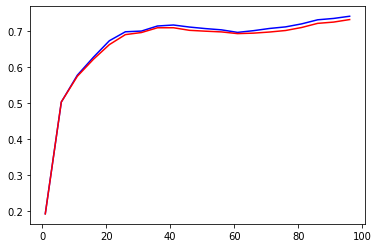

In [3]:
train_acc = []
val_acc = []

for n in range(1, 100,5):
    clf = AdaBoostClassifier(n_estimators=n, random_state=0)
    clf.fit(X_train, y_train)
    
    train_acc.append(clf.score(X_train, y_train))
    val_acc.append(clf.score(X_val, y_val))
    
plt.plot(range(1, 100,5), train_acc, 'b-')
plt.plot(range(1, 100,5), val_acc, 'r-')

In [4]:
clf = AdaBoostClassifier(n_estimators=25, random_state=0)
clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=25, random_state=0)

In [5]:
print('train score:', clf.score(X_train, y_train))
print('validation score:', clf.score(X_val, y_val))
print('test score:', clf.score(X_test, y_test))

train score: 0.687375
validation score: 0.6761666666666667
test score: 0.6659
